In [17]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

df = pd.read_csv('../Datasets/ts_human_activities.csv') 
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


<AxesSubplot:ylabel='activity'>

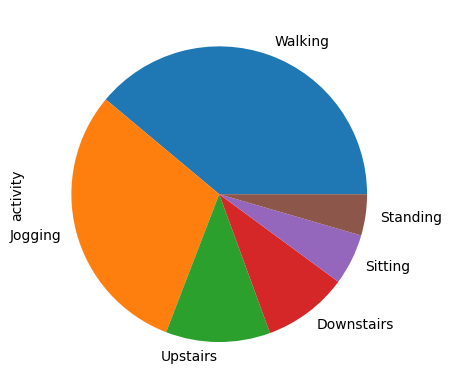

In [18]:
df['activity'].value_counts().plot(kind = 'pie')

In [19]:
df.drop(['user'], axis =1, inplace = True )

<AxesSubplot:>

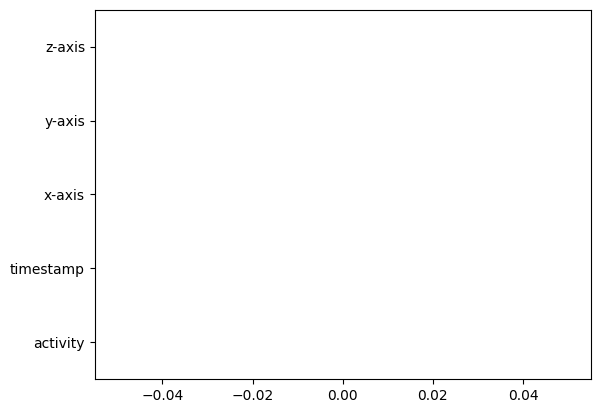

In [31]:
df.isnull().sum().plot(kind = "barh")

In [21]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

53788


In [22]:
df.groupby('activity').size() #equivalent of .value_counts()

activity
Downstairs     97381
Jogging       297463
Sitting        57315
Standing       47243
Upstairs      118922
Walking       401511
dtype: int64

<AxesSubplot:ylabel='Type'>

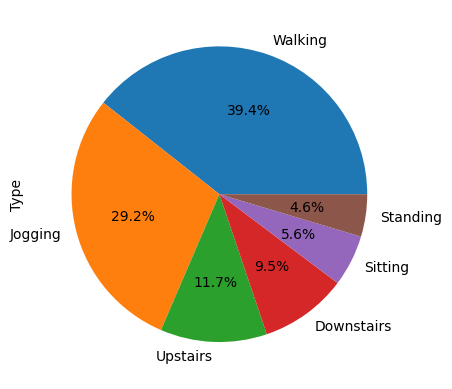

In [23]:
df['activity'].value_counts().plot(kind='pie',
                                       label = "Type",
                                       autopct='%1.1f%%')


In [24]:
label='activity'

g = df.groupby(label, group_keys=True)
balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)
balanced_df

,activity,timestamp,x-axis,y-axis,z-axis
0,Downstairs,2800632275000,-5.79,15.85,0.108963
1,Downstairs,14740812207000,-2.45,13.57,4.372132
2,Downstairs,2953622417000,1.92,9.92,4.331271
3,Downstairs,5305862347000,0.38,8.05,2.560000
4,Downstairs,2299192332000,-0.19,13.38,-3.490000
...,...,...,...,...,...
283453,Walking,118062201544000,-1.54,4.75,2.960000
283454,Walking,60034182292000,6.36,10.84,5.050000
283455,Walking,997082347000,-1.80,13.59,-2.370000
283456,Walking,22800061592000,-1.80,7.55,1.180000


In [25]:
#test group_keys True vs False
label='activity'

g = df.groupby(label, group_keys=True)
g = g.apply(lambda x :x)
g

activity       timestamp  x-axis  y-axis    z-axis
activity                                                                
Downstairs 24781    Downstairs   6552942304000   -0.15    9.15 -0.340000
           24782    Downstairs   6552992292000    0.11    9.19  2.760000
           24783    Downstairs   6553042310000   -4.06    7.40  4.020000
           24784    Downstairs   6553092298000   -2.87    7.93  3.210000
           24785    Downstairs   6553142347000   -0.19   10.04  4.820000
...                        ...             ...     ...     ...       ...
Walking    1047710     Walking  13369092267000   -2.22    6.32  5.434519
           1047711     Walking  13369142255000   -3.06    5.71  6.088296
           1047712     Walking  13369192273000   -3.49    5.83  5.788648
           1047713     Walking  13369242231000   -4.14    6.21  5.938472
           1047714     Walking  13369292279000   -4.90    6.55  3.827318

[1019835 rows x 5 columns]

In [26]:
balanced_df['activity'].value_counts()

Downstairs    47243
Jogging       47243
Sitting       47243
Standing      47243
Upstairs      47243
Walking       47243
Name: activity, dtype: int64

In [27]:
balanced_df.head()

,activity,timestamp,x-axis,y-axis,z-axis
0,Downstairs,2800632275000,-5.79,15.85,0.108963
1,Downstairs,14740812207000,-2.45,13.57,4.372132
2,Downstairs,2953622417000,1.92,9.92,4.331271
3,Downstairs,5305862347000,0.38,8.05,2.560000
4,Downstairs,2299192332000,-0.19,13.38,-3.490000


<AxesSubplot:>

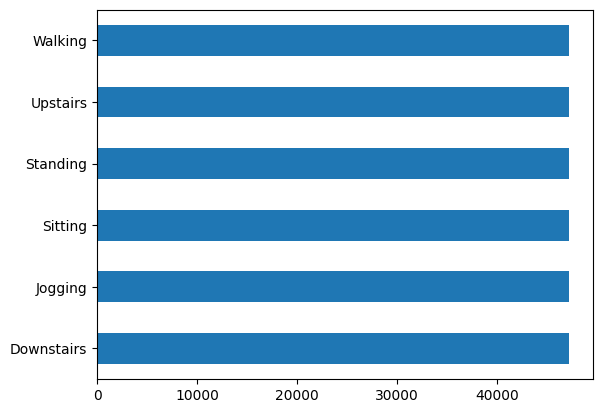

In [28]:
balanced_df['activity'].value_counts().plot(kind='barh',
                                       label = "Type")


In [29]:
balanced_df = balanced_df.groupby('activity', group_keys=False).apply(lambda x: x.sample(frac=0.5))
balanced_df.shape

(141732, 5)

In [30]:
balanced_df.to_csv('../Datasets/ts_human_activities_small.csv' ,index = None)